

# **Making A Speech Emotion Recognizer Using Python AndScikit-learn**

### Paul Ritter and Anthony Teate

### **Building a Speech Emotion Recognition system that detects emotion from human speech tone using the Scikit-Learn library,Python and Librosa**


**What is Speech Emotion Recognition?**

Speech Emotion Recognition, abbreviated as SER, is the act of attempting to recognize human emotion and affective states from speech.  This is capitalizing on the fact that voice often reflects underlying emotion through tone and pitch. This is also the phenomenon that animals like dogs and horses employ to be able to understand human emotion.  SER is tough because emotions are subjective and annotating audio is challenging.

**What is librosa?**

librosa is a Python library for analyzing audio and music. It has a flatter package layout, standardizes interfaces and names, backwards compatibility, modular functions, and readable code. Further, in this Python mini-project, I demonstrate how to install it (and a few other packages) with pip.

**Speech Emotion Recognition – Objective**

To build a model to recognize emotion from speech using the librosa and sklearn libraries and the RAVDESS dataset.

**Speech Emotion Recognition – About **

In this Python mini project, I use the libraries librosa, soundfile, and sklearn (among others) to build a model using an MLPClassifier. This will be able to recognize emotion from sound files. I will load the data, extract features from it, then split the dataset into training and testing sets. Then, I will initialize an MLPClassifier and train the model. Finally, I calculate the accuracy of our model.

**The Dataset**

For this Python mini project, I use the RAVDESS dataset; this is the Ryerson Audio-Visual Database of Emotional Speech and Songdataset, and is free to download. This dataset has 7356 files rated by 247 individuals 10 times on emotional validity, intensity, and genuineness. The entire dataset is 24.8GB from 24 actors, but I’ve lowered the sample rate on all the files, and you can download from Canvas.

**File Summary**

In total, the RAVDESS collection includes 7356 files (2880+2024+1440+1012 files).

**File naming convention**

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics:

**Filename identifiers** 



*   Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
*   Vocal channel (01 = speech, 02 = song).
*   Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = suprised
*   Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
*   Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
*   Repetition (01 = 1st repetition, 02 = 2nd repetition).
*   Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

*Filename example: 02-01-06-01-02-01-12.mp4*



*   Video-only (02)
*   Speech (01)
*   Fearful
*   Normal intensity (01)
*   Statement "dogs" (02)
*   1st Repetition (01)
*   12th Actor (12)
*   Female, as the actor ID number is even.

Find more information on the file structure and filenames from Zenodo: [Filename References](https://zenodo.org/record/1188976#.X39l7pNKjb3)

### **Prerequisites**

Install the following libraries with pip:

pip install librosa soundfile numpy sklearn pyaudio





The whole pipeline is as follows (same as any machine learning pipeline):


*   Preparing the Dataset: Here, I download and convert the dataset to be suited for extraction.
*   Loading the Dataset: This process is about loading the dataset in Python which involves extracting audio features, such as obtaining
*   Training the Model: After I prepare and load the dataset, I simply train it on a suited sklearn model.
*   Testing the Model: Measuring how good our model is doing.



## **Import the dependencies**

1.   import files

In [1]:
import soundfile # to read audio file
import numpy as np 
import matplotlib.pyplot as plt 
import librosa # to extract speech features
import glob
import os
import pickle # to save model after training 
from sklearn.model_selection import train_test_split # for splitting training and testing
from sklearn.neural_network import MLPClassifier # multi-layer perceptron model
from sklearn.metrics import accuracy_score 

2.   Define a function extract_feature to extract the mfcc, chroma, and mel features from a sound file. This function takes 4 parameters-the file name and three Boolean parameters for the three features:
3.   **mfcc**: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
4.   **chroma**: Pertains to the 12 different pitch classes
5.   **mel**: Mel Spectrogram Frequency




In [2]:

# Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma: 
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))     
    return result



3. Define a dictionary to hold numbers and the emotions available in the RAVDESS dataset, and a list to hold those we want-calm, happy, fearful, disgust.

In [3]:
# Emotions in the RAVDESS dataset
emotions = {
    '01':'neutral',
    '02':'calm',
    '03':'happy',
    '04':'sad',
    '05':'angry',
    '06':'fearful',
    '07':'disgust',
    '08':'surprised'
}

# Emotions to observe
observed_emotions = ['calm', 'happy', 'fearful', 'disgust']


4.   Load the data with a function load_data() – this takes in the relative size of the test set as parameter.


In [4]:
# Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("ravdess-data/Actor_*/*.wav"):
        file_name = os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature = extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size = test_size, random_state=9)

Using our emotions dictionary, this number is turned into an emotion, and the function checks whether this emotion is in the list of observed_emotions; if not, it continues to the next file. It makes a call to extract_feature and stores what is returned in ‘feature’. Then, it appends the feature to x and the emotion to y. So, the list x holds the features and y holds the emotions.

Call the function train_test_split with these, the test size, and a random state value, and return that.

5. Split the dataset into training and testing sets! Keep the test set 25% of everything and use the load_data function for this.


In [5]:
# Split the dataset
x_train, x_test, y_train, y_test = load_data(test_size = 0.25)

6. Observe the shape of the training and testing datasets:

In [6]:
# Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


7. And get the number of features extracted.

In [7]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


8. Initialize an MLPClassifier. This is a Multi-layer Perceptron Classifier; it optimizes the log-loss function using different optimizers (lbfgs, adam or stochastic gradient descent). Recall that the MLPClassifier has an internal neural network for the purpose of classification, and is a feed-forward ANN model.


In [8]:
# Initialize the Multi Layer Perceptron Classifier
model = MLPClassifier(solver='adam', alpha=0.005, batch_size=200, epsilon=1e-08,
                      hidden_layer_sizes=(400,),learning_rate='adaptive', max_iter=700)

9. Train the Model

In [9]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.005, batch_size=200, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(400,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=700,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

10. Plot the loss during training

A loss function, also known as a cost function, takes into account the probabilities or uncertainty of a prediction based on how much the prediction varies from the true value. This gives a more nuanced view into how well the model is performing.

In [10]:
loss_values = model.loss_curve_

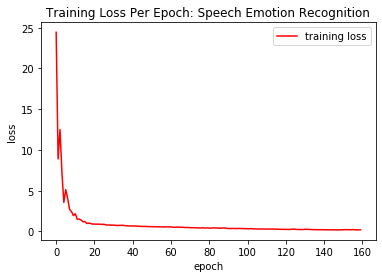

In [11]:
fig=plt.figure(figsize=(6, 4))
plt.plot(loss_values, color="red", label='training loss')
plt.xlabel('epoch')
plt.ylabel('loss');
#legend
plt.legend(loc='upper right')
#title
plt.title('Training Loss Per Epoch: Speech Emotion Recognition')
#show plot
plt.show()

11. <b> Model Predictions </b>

To calculate the accuracy of our model, call up the accuracy_score() function imported from sklearn. Finally, round the accuracy to 2 decimal places and print it out.

In [12]:
#Predict for the test set
y_pred = model.predict(x_test)

12. <b> Model Performance </b>

To calculate the accuracy of the model, call up the accuracy_score() function we imported from sklearn. Finally, round the accuracy to 2 decimal places and print it out.

In [13]:
# Calculate the accuracy of our model
accuracy = accuracy_score(y_true = y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 76.04%


In [14]:
print('test set accurracy: {0:.2f} %'.format(100*model.score(x_test,y_test)))

test set accurracy: 76.04 %


<b> Peformance on a single waveform</b>

In [15]:
print('The predictied emotion from the speech is: {}'      
      .format(model.predict([x_test[22]])[0]))

The predictied emotion from the speech is: happy


In [16]:
print('The true emotion is: {}'.format(y_test[22]))

The true emotion is: happy


<b> Pickle (serialize) and save the trained classifier to a folder </b>

In [17]:
# Serialization with Python's Pickle
import pickle 
import os

dest=os.path.join('classifiers', 'pkl_objects')
if not os.path.exists(dest):
    os.makedirs(dest)
    
pickle.dump(model, open(os.path.join(dest, 'ser_classifier.pkl'), 'wb'), protocol=4)

<b> Load the saved classifier into memory </b>

In [18]:
# load the saved the trained classifier into memory
import pickle
import re
import os

os.chdir('classifiers')
ser_model=pickle.load(open(os.path.join('pkl_objects', 'ser_classifier.pkl'), 'rb'))

<b> Test the re-loaded model </b>

In [19]:
print('The reloaded model predicts the  emotion from the speech is:{}'      
      .format(ser_model.predict([x_test[33]])[0]))

The reloaded model predicts the  emotion from the speech is:disgust


In [20]:
print('The true emotion is: {}'.format(y_test[33]))

The true emotion is: disgust


### <b> Summary </b> 

In this Python, Machine Learning, Mini-Project, we learned to recognize emotions from speech. We used an MLPClassifier for the neural netwoerk and and made use of the soundfile library to read the sound file, and the librosa library to extract features from it.  We also serialized the model and tested the reloaded model on unseen data and saw that it performed well. So, as you've seen, the model delivered an accuracy of 70-80%, which is not bad for our first attempt at building a speech emotion recognizer.